<a href="https://colab.research.google.com/github/Montimur/Assignments/blob/master/For_CS3100_Fall2024/MT1/MiddleThird.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
import sys

# -- Detect if in Own Install or in Colab
try:
    import google.colab
    OWN_INSTALL = False
except:
    OWN_INSTALL = True

if OWN_INSTALL:

  #---- Leave these definitions ON if running on laptop
  #---- Else turn OFF by putting them between ''' ... '''

  sys.path[0:0] = ['../../../../..',  '../../../../../3rdparty',
                   '../../../..',  '../../../../3rdparty',
                   '../../..',     '../../../3rdparty',
                   '../..',        '../../3rdparty',
                   '..',           '../3rdparty' ]

else: # In colab
  ! if [ ! -d Jove ]; then git clone https://github.com/ganeshutah/Jove Jove; fi
  sys.path.append('./Jove')
  sys.path.append('./Jove/jove')

# -- common imports --
from jove.DotBashers import *
from jove.Def_md2mc  import *
from jove.Def_DFA    import *
from jove.Def_NFA    import *
from jove.Def_RE2NFA import *
from jove.LangDef    import *  # for testing DFA actions using nthnumeric if needed
from jove.Def_NFA2RE import *
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Cloning into 'Jove'...
remote: Enumerating objects: 6652, done.
remote: Counting objects: 100% (2018/2018), done.
remote: Compressing objects: 100% (782/782), done.
remote: Total 6652 (delta 1228), reused 1915 (delta 1156), pack-reused 4634 (from 1)
Receiving objects: 100% (6652/6652), 10.57 MiB | 13.38 MiB/s, done.
Resolving deltas: 100% (4233/4233), done.
You may use any of these help commands:
help(ResetStNum)
help(NxtStateStr)

You may use any of these help commands:
help(md2mc)
.. and if you want to dig more, then ..
help(default_line_attr)
help(length_ok_input_items)
help(union_line_attr_list_fld)
help(extend_rsltdict)
help(form_delta)
help(get_machine_components)

You may use any of these help commands:
help(mkp_dfa)
help(mk_dfa)
help(totalize_dfa)
help(addtosigma_delta)
help(step_dfa)
help(run_dfa)
help(accepts_dfa)
help(comp_dfa)
help(flTup)
help(union_dfa)
help(intersect_dfa)
help(pruneUnreach)
help(iso_dfa)
help(langeq_dfa)
help(same_status)
help(h_langeq_dfa)
help(fixptDist

## Please read Exercise 7.5 starting Page 88. The Middle-Third construction begins on Page 89.

## This is a starter for the code where I discuss the "middle third" construction in the NFA section.

### Your extra-credit part (please do it on your own; don't ask fellow students, but ask us! please don't look online)

### Please design a "first half" language - FirstHalf is the name of the language.

#### * Specifically, generate a way to generate a (new) DFA (call it DFAnew) with respect to a given DFA (call it DFAin)

#### * I call the output BigDFA in the construction below

#### - BigDFA's language should be all "x" such that "xy" is in the language of DFAin where length(x) = length(y)

### * What to submit

#### - A fresh notebook - feel free to name variables better

#### - The final output ought to be a good set of tests (if a test "spins", quit that run by hitting the stop) and make a note

#### - At least nine (9) passing (finishing) and interesting languages ought to be included where the "halves" are verifiable.

#### - The RE4 below ran too long for middle-third but a similar run may finish for the first-half

##  * I PROVIDE A FEW TEST STRINGS YOU MUST INCLUDE (say 3 or 4 if all pass). You may plz provide enough to meet the quote of 9 asked (10 would be nice too). 11 is not needed since you want to make it "interesting" - not repetitive

### - You must document all the steps precisely as in the textbook, using that style and length as a guideline

### - The documentation can be alongside the Q,Sigma,delta,q0,F aspects, spending more space around delta. Need not be bloated - just precise and up to the point.

### * As a closing narrative, try to write a mathematical description of your work and your observations on the construction, pointing out what you learned. About a page of a standard paper format is good. Uploading an Overleaf-typeset (or other software) as a PDF upload would be expected.

### * Upload also your finished and executed notebook

## We will grade based on (1) the code working (70 percent) and documentation (30 percent)

#### Look for starter RE strings for FirstHalf below


In [2]:
# FOR YOUR FirstHalf language

RE1_FirstHalf = "aabb"

RE2_FirstHalf = "a*"

RE3_FirstHalf = "a*b*" # Try and see if this finishes and if so interpret

RE4_FirstHalf = "(ab) + (aabb)"

# ----

# MiddleThird of a DFA

RE1 = "aabbcc"

RE2 = "a*"

RE3 = "(aa)(bb)(cc)+abc"

RE4 = "abcabcabc"


REin = RE3

DFAin = min_dfa(nfa2dfa(re2nfa(REin)))

Generating LALR tables


In [3]:
#DFAin

In [4]:
#ntest = re2nfa("a*")

In [5]:
#ntest

In [6]:
#dd = dict({ (a,'b') : set({p,'q'})   for a in ['1','2'] for p in ['11','22']} )

In [7]:
#dd[ ('1','b')]

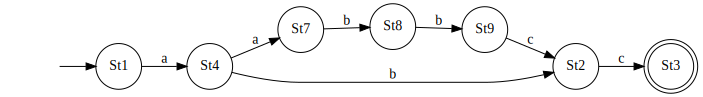

In [8]:
dotObj_dfa(DFAin)

In [9]:
QDin = DFAin["Q"]

Qnfa = { (x,y,z,p,q) for x in QDin for y in QDin for z in QDin for p in QDin for q in QDin }

In [10]:
#DFAin

In [11]:
SigDFAin = DFAin["Sigma"]

In [12]:
#SigDFAin

In [13]:
q0DFAin = DFAin["q0"]

In [14]:
#q0DFAin

In [15]:
Q0NFA = { (q0DFAin, q1, q1, q2, q2) for q1 in QDin for q2 in QDin }

In [16]:
#Q0NFA

In [17]:
FNFA = { (q1,q1,q2,q2,qf) for q1 in  QDin for q2 in QDin for qf in DFAin["F"]}

In [18]:
#FNFA

In [19]:
#DFAin["Delta"]

### Main thing for NFA

In [20]:
deltaNFA = dict( {
      ((qa, q1, qb, q2, qc), y) :
         set( { ( DFAin["Delta"][(qa,c1)], q1,
                  DFAin["Delta"][(qb,y)],  q2,
                  DFAin["Delta"][(qc,c2)] )
                 for c1 in SigDFAin
                 for c2 in SigDFAin
              }
            )
     for q1 in QDin for q2 in QDin
     for qa in QDin for qb in QDin for qc in QDin
     for y in SigDFAin } )

In [21]:
#deltaNFA

In [22]:
help(mk_nfa)

Help on function mk_nfa in module jove.Def_NFA:

mk_nfa(Q, Sigma, Delta, Q0, F)
    Check for structural consistency of the given NFA traits.
    If the check passes, make and return an NFA.



In [23]:
nBignfa =  {"Q":Qnfa, "Sigma":SigDFAin, "Delta":deltaNFA, "Q0":Q0NFA, "F":FNFA}

In [24]:
#Qnfa

In [25]:
# is_consistent_nfa_new(nBignfa)

In [26]:
BigNFA = mk_nfa(Qnfa, SigDFAin, deltaNFA, Q0NFA, FNFA)
#q0NFA
#SigDFAin
#deltaNFA
#Q0NFA
#FNFA

In [27]:
BigNFA = mk_nfa(Qnfa, SigDFAin, deltaNFA, Q0NFA, FNFA)

In [28]:
BigDFA = min_dfa(nfa2dfa(BigNFA))

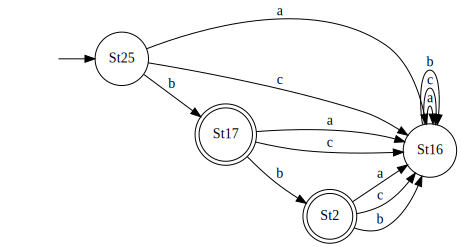

In [29]:
dotObj_dfa(BigDFA)